In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sartajbhuvaji_brain_tumor_classification_mri_path = kagglehub.dataset_download('sartajbhuvaji/brain-tumor-classification-mri')

print('Data source import complete.')


Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

## Import Libraries

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense , BatchNormalization , Flatten
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import io
from PIL import Image
import tqdm
import cv2
from sklearn.utils import  shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Folder Path

In [5]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in labels:
    folderpath = os.path.join( '/kaggle/input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderpath):
        img = cv2.imread( os.path.join( folderpath, j))
        img = cv2.resize( img, (image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderpath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderpath):
        img = cv2.imread(os.path.join(folderpath, j))
        img = cv2.resize( img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train, Y_train = shuffle( X_train, Y_train, random_state = 42)

In [7]:
X_train.shape , Y_train.shape

((3264, 150, 150, 3), (3264,))

## Train Test Split

In [8]:
x_train , x_test , y_train, y_test = train_test_split( X_train, Y_train , test_size = 0.2, random_state = 53)

In [9]:
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((2611, 150, 150, 3), (653, 150, 150, 3), (2611,), (653,))

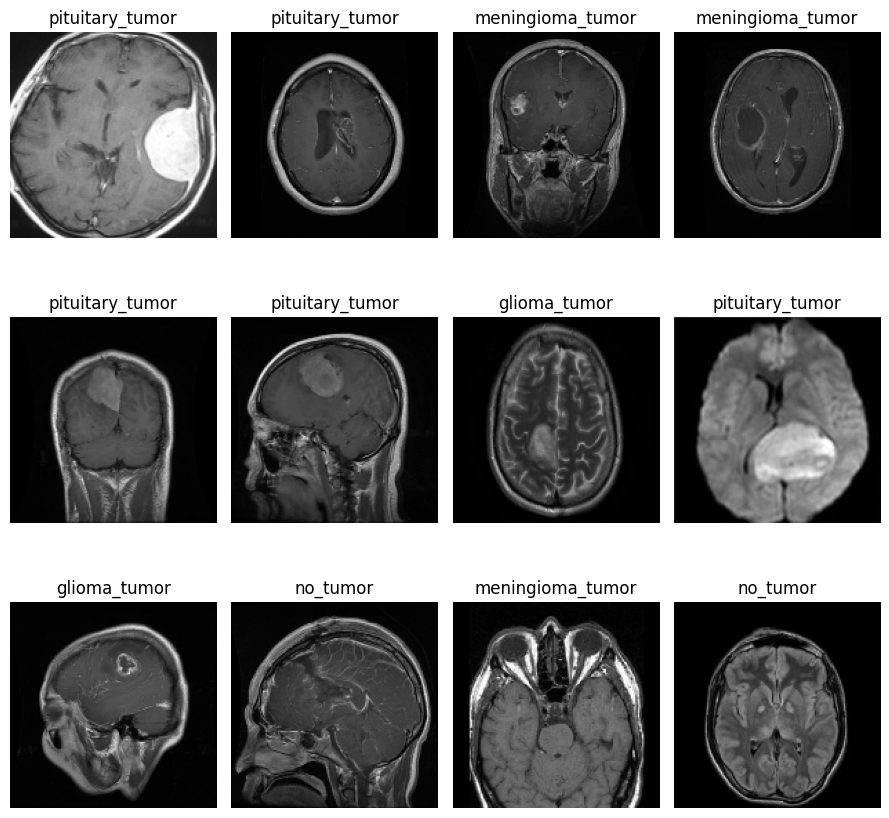

In [10]:
# Visualize the images

rows ,cols = 3,4
plt.figure(figsize=(9,9))
for i in range(12) :
    plt.subplot(rows, cols , i+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
Y_train_new = []
for i in y_train:
    Y_train_new.append(labels.index(i))
    y_train_scale = to_categorical(Y_train_new)

In [12]:
Y_test_new = []
for i in y_test:
    Y_test_new.append(labels.index(i))
    y_test_scale = to_categorical(Y_test_new)

## Convoluational Neural Network (CNN)

In [13]:
# Create a model
model = Sequential()
# CNN Strecture
model.add(Conv2D(input_shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3]),filters = 64, kernel_size = (3,3), activation = 'relu' ))
model.add(Conv2D(filters = 56, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64 ,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 94, kernel_size = (3,3), activation = 'relu' ))
model.add(Conv2D(filters = 58, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 104 ,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 92, kernel_size = (3,3), activation = 'relu' ))
# Flatten the input
model.add(Flatten())
model.add(Dense(units = 102 , activation = 'relu'))
model.add(Dense(units = 75 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 95 , activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 82 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 62 , activation = 'relu'))
model.add(Dense(units = 123 , activation = 'relu'))
# Final layer
model.add(Dense(units=y_train_scale.shape[1], activation='softmax'))




In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 56)   │        32,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 56)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        32,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 94)     │        54,238 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 31, 31, 58)     │        49,126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 58)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 104)    │        54,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 104)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 92)       │        86,204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 102)            │       150,246 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,725 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 95)             │         7,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 95)             │           380 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 82)             │         7,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 82)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 62)             │         5,146 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 123)            │         7,749 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           496 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497,218 (1.90 MB)

 Trainable params: 497,028 (1.90 MB)

 Non-trainable params: 190 (760.00 B)

In [15]:
model.compile(optimizer = Adam() , loss = CategoricalCrossentropy(), metrics = ['accuracy'])

In [16]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [17]:
history = model.fit(x_train, y_train_scale, epochs= 25  , validation_data = (x_test,y_test_scale),validation_split=0.1, verbose=1)

Epoch 1/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 34s 228ms/step - accuracy: 0.3136 - loss: 1.3597 - val_accuracy: 0.1730 - val_loss: 3.2085
Epoch 2/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.3816 - loss: 1.2643 - val_accuracy: 0.2603 - val_loss: 1.4374
Epoch 3/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.4616 - loss: 1.2139 - val_accuracy: 0.3476 - val_loss: 1.2392
Epoch 4/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.5117 - loss: 1.1288 - val_accuracy: 0.5176 - val_loss: 1.0792
Epoch 5/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.5280 - loss: 1.0222 - val_accuracy: 0.5176 - val_loss: 1.0442
Epoch 6/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.5858 - loss: 0.9457 - val_accuracy: 0.5819 - val_loss: 0.8739
Epoch 7/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.6356 - loss: 0.8708 - val_accuracy: 0.3093 - val_loss: 1.7634
Epoch 8/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6231 - loss: 0.8675 - val_accuracy: 0.61

In [18]:
model.evaluate(x_train,y_train_scale)
model.evaluate(x_test,y_test_scale)

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9713 - loss: 0.0899
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8762 - loss: 0.4812


[0.43231645226478577, 0.8912710547447205]

In [19]:
np.argmax(model.predict(x_test),axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


array([1, 1, 2, 3, 3, 3, 1, 1, 3, 0, 1, 1, 3, 1, 0, 0, 1, 1, 3, 1, 0, 0,
       2, 3, 1, 1, 3, 2, 2, 0, 3, 0, 0, 3, 3, 0, 0, 1, 1, 1, 3, 1, 0, 3,
       2, 0, 1, 3, 0, 3, 0, 0, 2, 2, 3, 3, 3, 1, 1, 3, 1, 3, 2, 1, 2, 0,
       2, 1, 3, 2, 3, 2, 3, 3, 1, 3, 3, 3, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0,
       3, 3, 0, 0, 1, 0, 1, 0, 3, 1, 1, 2, 1, 3, 1, 0, 1, 3, 2, 0, 3, 0,
       2, 0, 1, 2, 3, 0, 3, 0, 3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       1, 3, 2, 2, 1, 3, 2, 0, 3, 3, 2, 3, 3, 3, 1, 0, 3, 2, 2, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 0, 3, 1, 2, 1, 3, 1, 3, 0, 0, 2, 2, 0, 0, 3,
       1, 3, 1, 1, 0, 0, 0, 3, 0, 3, 1, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 1,
       3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 3, 3, 2, 0, 3, 2, 3,
       1, 1, 1, 1, 3, 1, 2, 3, 0, 2, 2, 1, 2, 1, 1, 0, 3, 0, 1, 2, 2, 0,
       3, 0, 0, 1, 2, 3, 2, 3, 2, 2, 1, 3, 2, 2, 1, 0, 3, 1, 1, 0, 3, 1,
       3, 2, 3, 3, 0, 3, 3, 3, 1, 0, 2, 1, 0, 3, 3, 0, 3, 2, 1, 1, 2, 3,
       0, 1, 1, 0, 1, 0, 3, 0, 0, 3, 0, 3, 1, 3, 1,

## Visualize the Outcomes

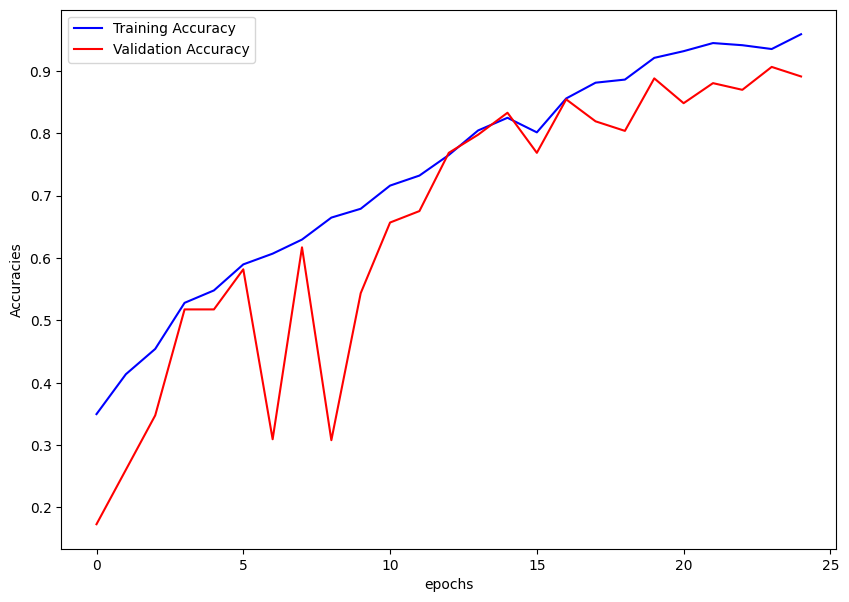

In [20]:
# Accuracies

epochs = range(len(history.history['accuracy']))

plt.figure(figsize=(10,7))
plt.plot(epochs, history.history['accuracy'], 'b',label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'],'r', label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

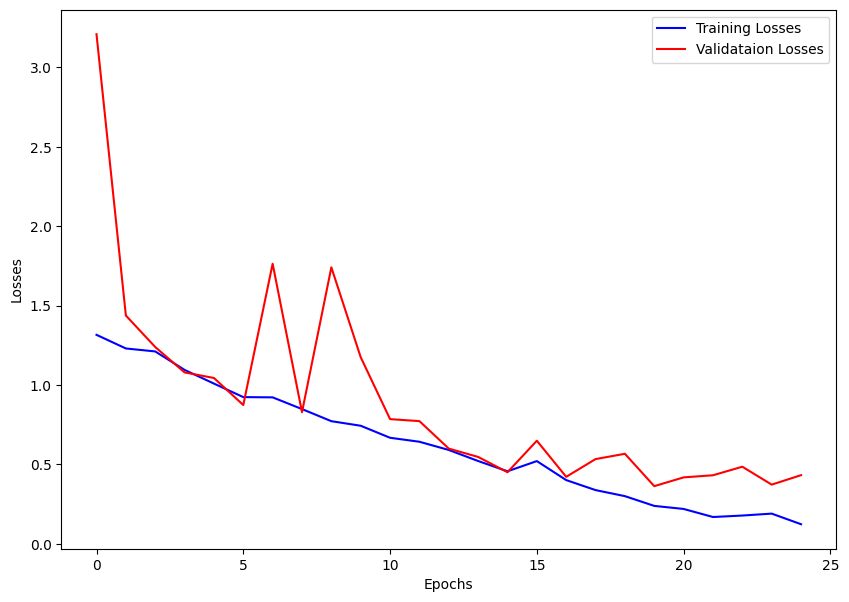

In [21]:
# Losses

epochs = range(len(history.history['loss']))

plt.figure(figsize=(10,7))
plt.plot(epochs, history.history['loss'], 'b', label='Training Losses')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validataion Losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

In [22]:
x_train.shape, y_train_scale.shape

((2611, 150, 150, 3), (2611, 4))

## Prediction

In [24]:
def pred (path):
    im = cv2.imread(path)
    im = cv2.resize(im,(150,150))
    im = np.array(im)
    im_ar = im.reshape(1,150,150,3)
    mo = model.predict(im_ar)
    arg = mo.argmax()
    return arg

In [25]:
print(pred('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(20).jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
3


In [26]:
model.save("tumor_model.keras")

In [35]:
model.save("tumer_model.h5")

In [37]:
%%writefile app.py
import streamlit as st
import cv2
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from PIL import Image

model = load_model("tumor_model.keras")
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

st.title("Brain Tumor MRI Image Classifier")
st.write("Upload an MRI image to predict the tumor type.")

uploaded_file = st.file_uploader("Choose an image..", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert("RGB")
    st.image(img, caption='Uploaded Image', width=400)
    img = np.array(img)
    img = cv2.resize(img,(150,150))
    img = img.reshape(1,150,150,3)

    prediction = model.predict(img)
    predicted_label = labels[np.argmax(prediction)]

    st.success(f"Prediction: **{predicted_label}**")


Overwriting app.py


In [28]:
from keras.models import load_model
model = load_model("tumor_model.keras")

In [31]:
!wget -q -O - ipv4.icanhazip.com

35.233.167.245


In [33]:
!streamlit run app.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴your url is: https://common-dancers-arrive.loca.lt
^C


In [34]:
!python --version

Python 3.11.12
